In [170]:
import webrtcvad
from IPython.display import Audio
from scipy.io.wavfile import read
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf  

def get_labels(audio, s_r, frame_duration=10,vad_level_of_agression=1):
    vad=webrtcvad.Vad(vad_level_of_agression)
    samples_per_frame = frame_duration * s_r//1000
    frames = []
    for i in range(int(len(audio)//samples_per_frame)-1):
        frame = np.int16(audio[i*samples_per_frame:(i+1)*samples_per_frame]).tobytes()
        frames.append(vad.is_speech(frame, s_r))
    frames = np.array(frames).repeat(samples_per_frame)
    frames = np.concatenate((frames,np.array([frames[-1]]*(len(audio)-len(frames)))),axis =0)
    return frames

In [166]:
labels = get_labels(audio2,s_r2,vad_level_of_agression=3)

In [153]:
audio2,s_r2 = sf.read('14-208-0000.flac',dtype='int16')

In [167]:
len(labels)

245520

In [168]:
len(audio2)

245520

In [152]:
Audio(data=audio2,rate=s_r)

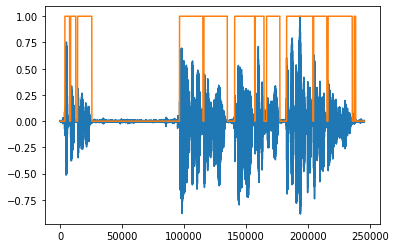

In [169]:
plt.plot(audio2/max(audio2))
plt.plot(labels+0)

In [100]:
i = 12
samples_per_frame =160
frame = np.float16(audio2[i*samples_per_frame:(i+1)*samples_per_frame]).tobytes()
vad.is_speech(frame,s_r)

True

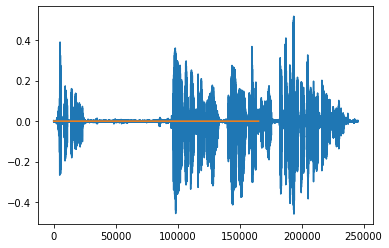

In [63]:
plt.figure()
plt.plot(audio2)
plt.plot(frames);